# Zomato Bangaluru Prediction

In [1]:
from IPython.display import Image
from IPython.core.display import HTML 

In [123]:
Image(url='https://www.google.com/imgres?imgurl=https%3A%2F%2Fblog.ipleaders.in%2Fwp-content%2Fuploads%2F2021%2F08%2Fzomato-infinity-dining-916x516-1.jpg&imgrefurl=https%3A%2F%2Fblog.ipleaders.in%2Flegal-formalities-for-registering-a-restaurant-on-zomato%2F&tbnid=V8H-4gXRvqYTVM&vet=12ahUKEwiQ7LKK5e75AhWsi9gFHZssDa4QMygLegUIARDxAQ..i&docid=mVL3LQdcUVs5eM&w=916&h=516&q=zomato&ved=2ahUKEwiQ7LKK5e75AhWsi9gFHZssDa4QMygLegUIARDxAQ')

# Import Necessary Libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff

/Users/a/opt/anaconda3/lib/python3.8/site-packages/google/colab/data_table.py:30: UserWarning:

IPython.utils.traitlets has moved to a top-level traitlets package.



In [4]:
df = pd.read_csv('zomato.csv')
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


### Column Description

* url : contains the url of the restaurant in the zomato website
* address : contains the address of the restaurant in Bengaluru
* name : contains the name of the restaurant
* online_order : whether online ordering is available in the restaurant or not
* book_table : table book option available or not
* rate : contains the overall rating of the restaurant out of 5
* votes : contains total number of rating for the restaurant as of the above mentioned date
* phone : contains the phone number of the restaurant
* location : contains the neighborhood in which the restaurant is located
* rest_type : restaurant type
* dish_liked : dishes people liked in the restaurant
* cuisines : food styles, separated by comma
* cost_two : contains the approximate cost for meal for two people
* reviews_list : list of tuples containing reviews for the restaurant, each tuple
* menu_item : contains list of menus available in the restaurant
* service_type : type of meal
* serve_to : contains the neighborhood in which the restaurant is listed

In [5]:
df.shape

(51717, 17)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

## Checking for missing values

In [7]:
df.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [9]:
[features for features in df.columns if df[features].isnull().sum()>0]

['rate',
 'phone',
 'location',
 'rest_type',
 'dish_liked',
 'cuisines',
 'approx_cost(for two people)']

In [10]:
#Another way to check miising values

In [11]:
pd.DataFrame(round(df.isnull().sum()/df.shape[0] * 100,3), columns = ['Missing'])

,Missing
url,0.000
address,0.000
name,0.000
online_order,0.000
book_table,0.000
rate,15.034
votes,0.000
phone,2.336
location,0.041
rest_type,0.439


* The variable dish_liked has more than 50% of the missing data. If we drop the data we would lose 50% of the data.

* To simplify the analysis we are going to drop some of the unecessary columns url, address, phone.

In [12]:
df.drop(['url', 'address', 'phone'], axis=1, inplace = True)

In [13]:
# Renaming the column name

In [19]:
df.rename(columns = { 'approx_cost(for two people)' : 'cost_for_two' , 'listed_in(type)' : 'service_type', 'listed_in(city)' : 'serve_to'},inplace=True)

In [20]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost_for_two,reviews_list,menu_item,service_type,serve_to
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   name          51717 non-null  object
 1   online_order  51717 non-null  object
 2   book_table    51717 non-null  object
 3   rate          43942 non-null  object
 4   votes         51717 non-null  int64 
 5   location      51696 non-null  object
 6   rest_type     51490 non-null  object
 7   dish_liked    23639 non-null  object
 8   cuisines      51672 non-null  object
 9   cost_for_two  51371 non-null  object
 10  reviews_list  51717 non-null  object
 11  menu_item     51717 non-null  object
 12  service_type  51717 non-null  object
 13  serve_to      51717 non-null  object
dtypes: int64(1), object(13)
memory usage: 5.5+ MB


# Exploratory Data Analysis

* In rate column the data type shows object.To convert variable to float we could simply do astype(float).But in     this case it is a comma or / seperated numbers eg:3.8/5
* To avoid this problem we are using lambda and replace function to convert it into float.

In [23]:
df.rate.unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

* We need to reply the NEW & - value from the rate column into NaN value to convert the object data type to str.

In [24]:

df['rate'] = df.rate.replace('NEW', np.NaN)
df['rate'] = df.rate.replace('-', np.NaN)
df.rate = df.rate.astype(str)


In [25]:
df.rate = df.rate.apply(lambda x : x.replace("/5", " ")).astype(float)
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost_for_two,reviews_list,menu_item,service_type,serve_to
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


* cost_for_two has object data value.So need to convert it into integer.

In [28]:
df.cost_for_two = df.cost_for_two.astype(str)
df.cost_for_two = df.cost_for_two.apply(lambda x : x.replace(',','')).astype(float)

In [29]:
df.cost_for_two.dtype

dtype('float64')

# Visualization

In [31]:
import matplotlib

/Users/a/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='rate', ylabel='count'>

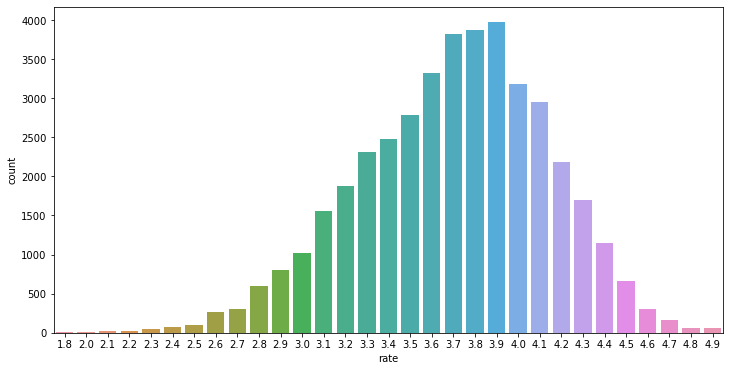

In [33]:
matplotlib.rcParams['figure.figsize'] = [12,6]
sns.countplot(df.rate)

/Users/a/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



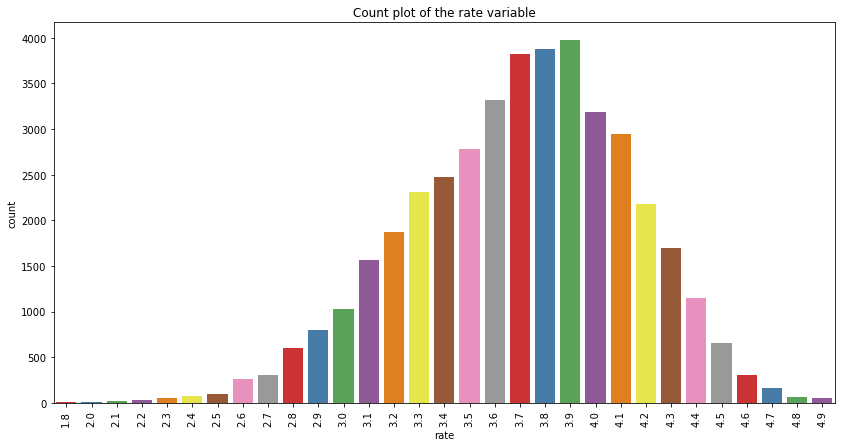

In [34]:
plt.rcParams['figure.figsize'] = 14,7
sns.countplot(df['rate'], palette='Set1')
plt.title("Count plot of the rate variable")
plt.xticks(rotation = 90)
plt.show()

From the above rate distribution it nearly follows normal distribution with a mean equal to 3.7. The graph show that the majority of the restaurant rating lies between the 3.4 - 4.2. Very few restaurants have rating 4.8.


### Plotting a joint plot for rate vs votes:

* Joint plot allows us to compare two different variables and see if there is any relationship between these two variables. By using joint plot we can do both univariate and bivariate analysis by plotting the scatter plot (bivariate) and distribution plot (univariate) of two different variables in a single plotting grid

* Univariate analysis is the analysis of one (“uni”) variable. Bivariate analysis is the analysis of exactly two variables. Multivariate analysis is the analysis of more than two variables

<Figure size 1008x720 with 0 Axes>

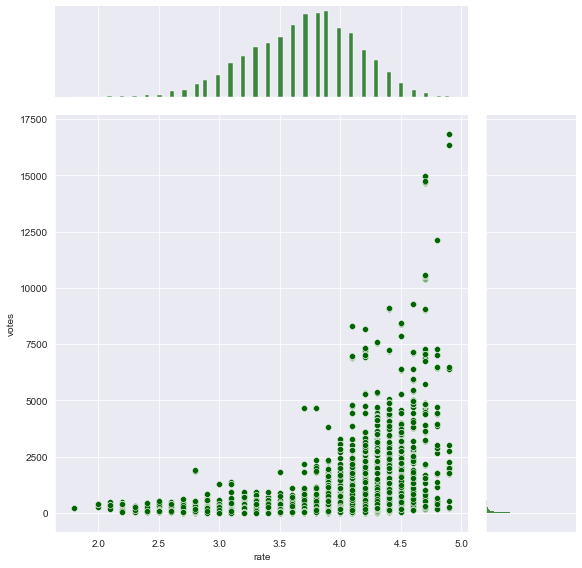

In [35]:
plt.figure(figsize=(14,10))
sns.set_style("darkgrid")
sns.jointplot(x = 'rate', y = 'votes', data=df, color = 'darkgreen',height = 8, ratio = 4)

* From the scatter plot we can see that the restaurants with higher number of rating has more votes. The distribution plot of votes on the right side indicates that the majority of votes pooled lie in bucket of 1000-2500.

### Bar Plot

__Barplot__ is one of the mostt commonly used graphic to represent the data. Barplot represents the data in rectangular bars with the length of the bar proportional to the value of variable. We will analyze the variable location and see in which area most of the restaurants are located in Bangalore.

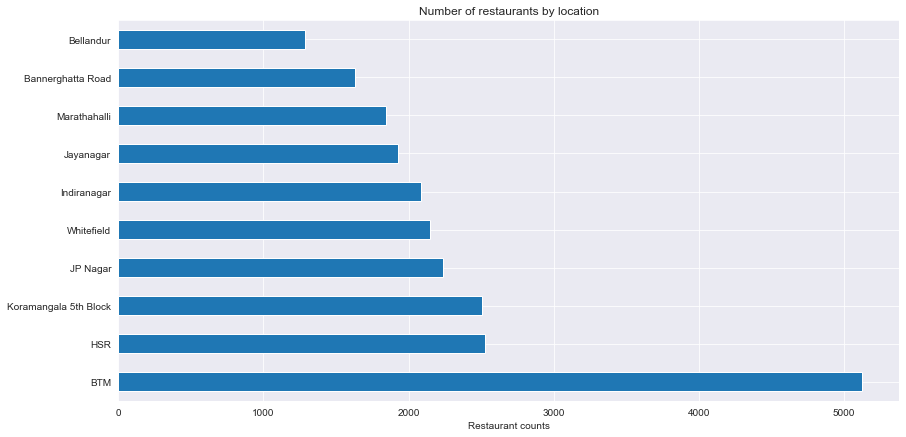

In [36]:
df.location.value_counts().nlargest(10).plot(kind='barh')
plt.title("Number of restaurants by location")
plt.xlabel("Restaurant counts")
plt.show()

* From the above visualization we can say that most number of the restaurants are located at __BTM__ which makes it most popular residential and commercial and residential places in Banglore.

<AxesSubplot:xlabel='online_order', ylabel='count'>

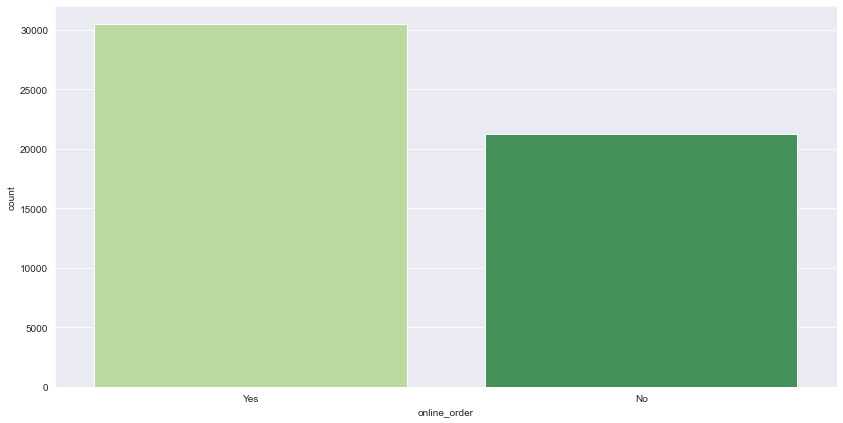

In [43]:
sns.countplot(x = 'online_order', data = df , palette = 'YlGn')

* From the above graph it is shown that online_order is more.

<AxesSubplot:xlabel='book_table', ylabel='count'>

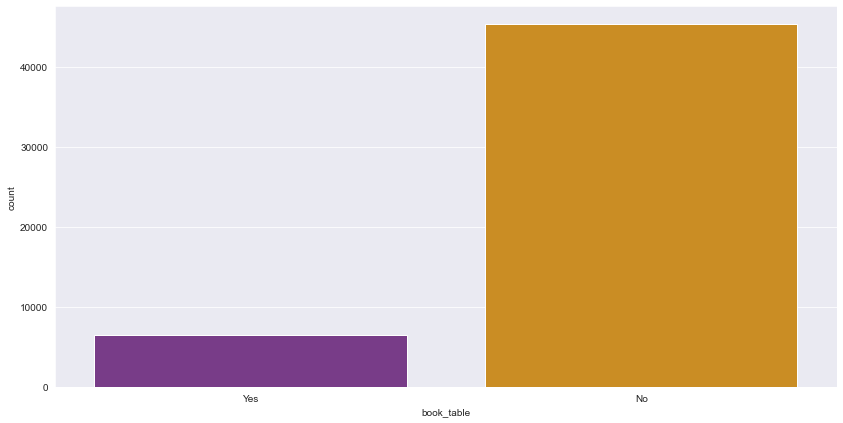

In [45]:
sns.countplot(x = 'book_table', data = df, palette = 'CMRmap')

* The number of book_table is low.
* So most of them are preferred online order rather than book_table.

## Pie Chart

In [51]:
online_order_label = df.online_order.value_counts().index
online_order_label

Index(['Yes', 'No'], dtype='object')

In [52]:
online_order_value = df.online_order.value_counts().values
online_order_value

array([30444, 21273])

([<matplotlib.patches.Wedge at 0x7fa3e25d0490>,
 [Text(-0.30245810454915784, 1.0576006311422714, 'Yes'),
  Text(0.30245810454915795, -1.0576006311422714, 'No')],
 [Text(-0.16497714793590426, 0.5768730715321481, '58.87%'),
  Text(0.16497714793590432, -0.576873071532148, '41.13%')])

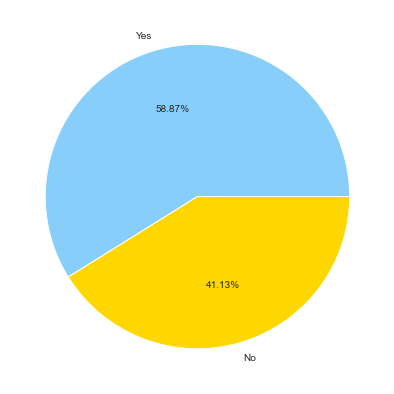

In [56]:
plt.pie(online_order_value, labels = online_order_label ,autopct = '%1.2f%%',radius = 1,colors = ['lightskyblue','gold'])

### Restaurant Listed in
Let's see to in which area most of the restaurants are listed in or deliver to

In [57]:
df.serve_to.value_counts()

BTM                      3279
Koramangala 7th Block    2938
Koramangala 5th Block    2836
Koramangala 4th Block    2779
Koramangala 6th Block    2623
Jayanagar                2371
JP Nagar                 2096
Indiranagar              1860
Church Street            1827
MG Road                  1811
Brigade Road             1769
Lavelle Road             1744
HSR                      1741
Marathahalli             1659
Whitefield               1620
Residency Road           1620
Bannerghatta Road        1617
Brookefield              1518
Old Airport Road         1425
Kammanahalli             1329
Kalyan Nagar             1309
Basavanagudi             1266
Sarjapur Road            1261
Electronic City          1229
Bellandur                1227
Frazer Town              1185
Malleshwaram             1096
Rajajinagar              1079
Banashankari              863
New BEL Road              740
Name: serve_to, dtype: int64

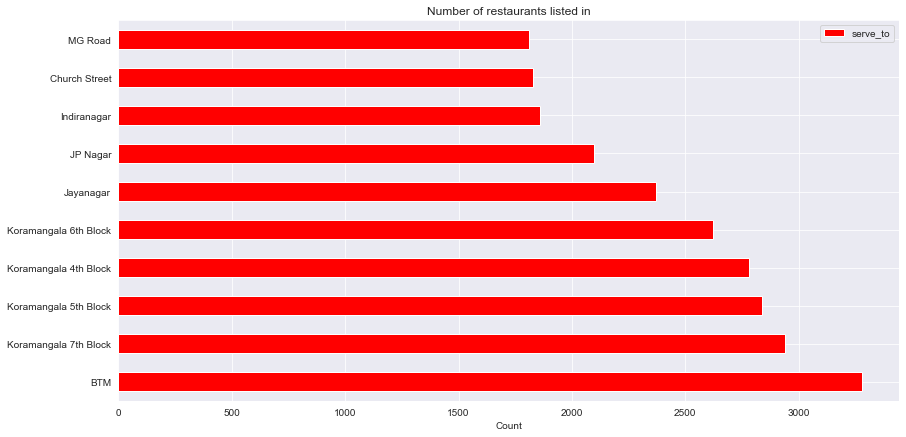

In [58]:
df.serve_to.value_counts().nlargest(10).plot(kind = 'barh', color = 'r')
plt.title("Number of restaurants listed in")
plt.xlabel("Count")
plt.legend()
plt.show()

As expected most of the restaurants listed_in deliver to BTM location because this area is home to over more than 3000 restaurants. Even though Koramangaka 7th Block dont have many restaurants still it stands second in terms of the m=number of restaurants that deliver to this location.

### Checking whether the online order facility impacts the rating of the restaurants


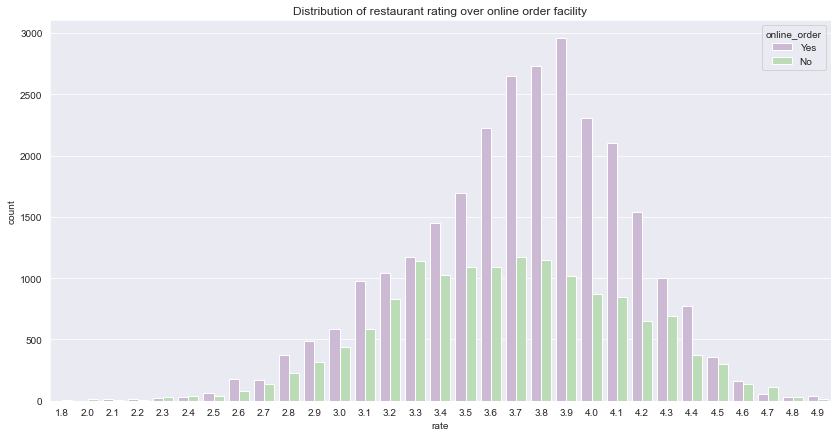

In [60]:
sns.countplot(x = df['rate'], hue = df['online_order'], palette= 'PRGn')
plt.title("Distribution of restaurant rating over online order facility")
plt.show()

* We can clearly observered that If the restaurant which dont have online order facility are more like to lose the rating as compared to the restuarants which have online order facility

### Rest_type listed

In [63]:
df.rest_type.values

array(['Casual Dining', 'Casual Dining', 'Cafe, Casual Dining', ...,
       'Bar', 'Bar', 'Bar, Casual Dining'], dtype=object)

In [61]:
df.rest_type.value_counts()

Quick Bites                   19132
Casual Dining                 10330
Cafe                           3732
Delivery                       2604
Dessert Parlor                 2263
                              ...  
Food Court, Beverage Shop         2
Dessert Parlor, Food Court        2
Cafe, Food Court                  2
Quick Bites, Kiosk                1
Sweet Shop, Dessert Parlor        1
Name: rest_type, Length: 93, dtype: int64

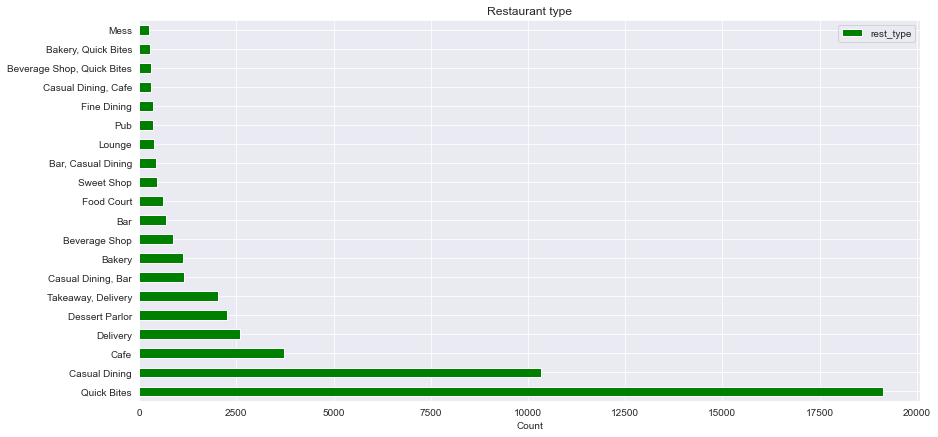

In [66]:
df.rest_type.value_counts().nlargest(20).plot(kind = 'barh', color = 'g')
plt.title("Restaurant type")
plt.xlabel("Count")
plt.legend()
plt.show()

* From the above visuals shows the top 20 restaurant type. We can see that the restaurant type Quick Bites is more popular among people as compared to the rest of the restaurant types.

In [67]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost_for_two,reviews_list,menu_item,service_type,serve_to
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


## Top Restaurants in Bangalore

In [68]:
df.name.value_counts()

Cafe Coffee Day            96
Onesta                     85
Just Bake                  73
Empire Restaurant          71
Five Star Chicken          70
                           ..
Quality Dum Biriyani        1
Lassi Ghar                  1
V V Hotel                   1
Aadhya's Fresh and Rich     1
The Druid Garden            1
Name: name, Length: 8792, dtype: int64

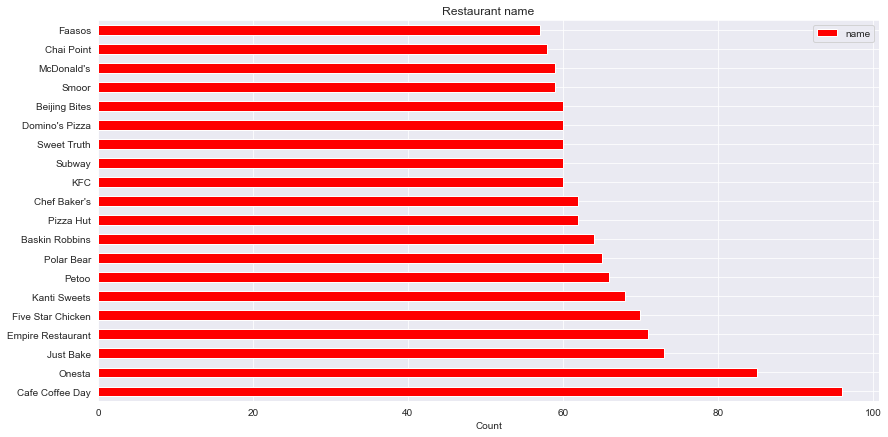

In [70]:
df.name.value_counts().nlargest(20).plot(kind = 'barh', color = 'r')
plt.title("Restaurant name")
plt.xlabel("Count")
plt.legend()
plt.show()

* Most of them preferred Cafe coffee Day than other restuarents.

### Dishes 

In [71]:
df.dish_liked.value_counts()

Biryani                                                                                                                       182
Chicken Biryani                                                                                                                73
Friendly Staff                                                                                                                 69
Waffles                                                                                                                        68
Paratha                                                                                                                        57
                                                                                                                             ... 
Pizza, Pasta, Mocktails, Tiramisu, Salads, Cocktails, Wine                                                                      1
Pizza, Pasta, Sangria, Bruschettas, Salads, Nachos, Tiramisu                              

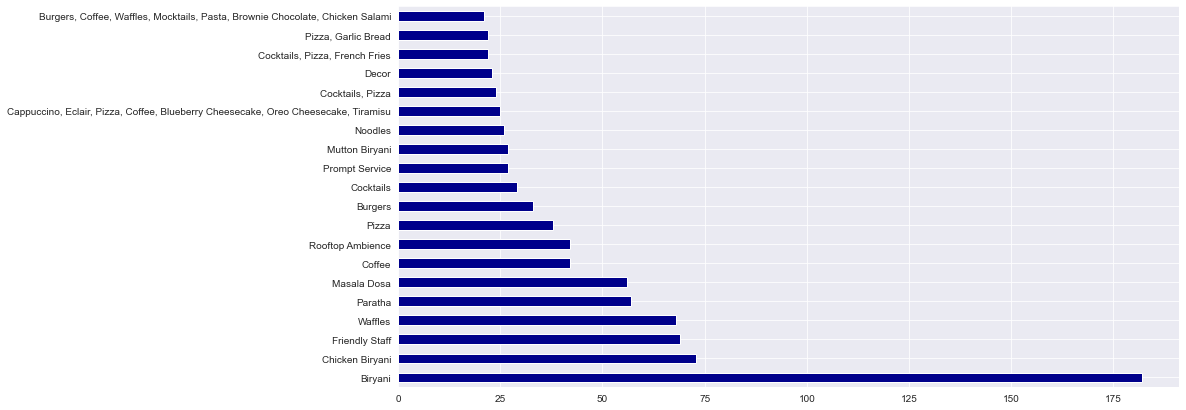

In [75]:
df.dish_liked.value_counts().nlargest(20).plot(kind = 'barh',color = 'darkblue')
plt.show()

* Most of them liked Biriyani dish compared to the other dishes.

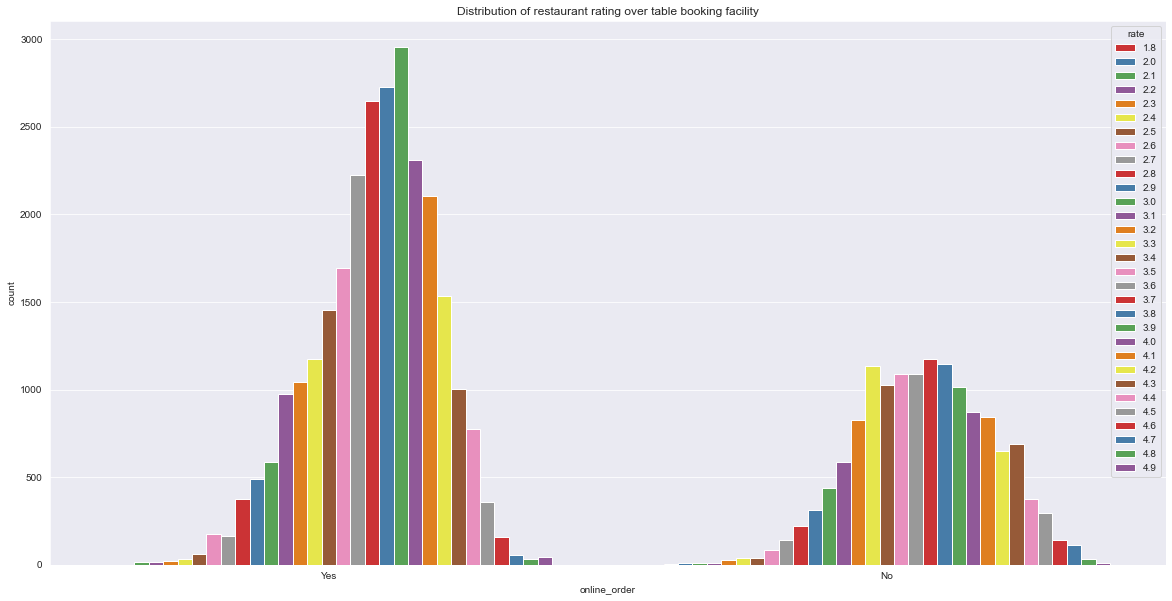

In [76]:
# Now lets check how to rating affects if the restaurant has table booking or not.
plt.figure(figsize=(20,10))
sns.countplot(x = df['online_order'], hue = df['rate'], palette= 'Set1')
plt.title("Distribution of restaurant rating over table booking facility")
plt.show()


* We can clearly see that the ratings affects drastically if the restaurant has table booking or not. The restaurants which are having table booking facility tends to have higher ratings as compared to the restaurants which dont have table booking facility available with them.

## Comparing Biggest Restaurant Chain and Best Restaurant Chain

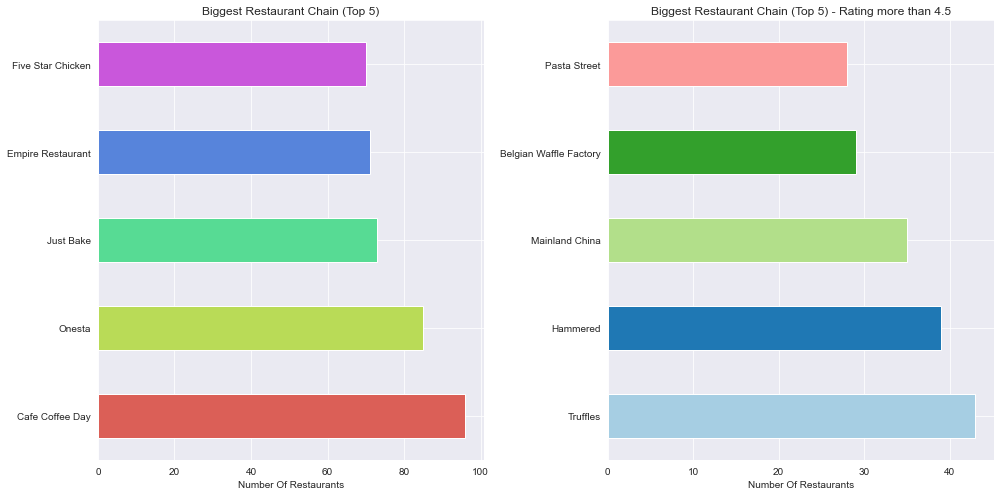

In [77]:
plt.rcParams['figure.figsize'] = 14,7
plt.subplot(1,2,1)

df.name.value_counts().head().plot(kind = 'barh', color = sns.color_palette("hls", 5))
plt.xlabel("Number Of Restaurants")
plt.title("Biggest Restaurant Chain (Top 5)")

plt.subplot(1,2,2)

df[df['rate'] >= 4.5]['name'].value_counts().nlargest(5).plot(kind = 'barh', color = sns.color_palette("Paired"))
plt.xlabel("Number Of Restaurants")
plt.title("Biggest Restaurant Chain (Top 5) - Rating more than 4.5")
plt.tight_layout()

* Cafe Coffee Day chain has over 90 cafes across the city that are listed in Zomato. On the other hand, Truffles - a burger chain has the best fast food restaurant (rating more than 4.5 out of 100), quality over quantity.

# Feature Engineering

In [78]:
df.isnull().sum()

name                0
online_order        0
book_table          0
rate            10052
votes               0
location           21
rest_type         227
dish_liked      28078
cuisines           45
cost_for_two      346
reviews_list        0
menu_item           0
service_type        0
serve_to            0
dtype: int64

In [82]:
# Replacing the NaN values in rate feature

df['rate'] = df['rate'].fillna(df['rate'].mean())

/Users/a/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



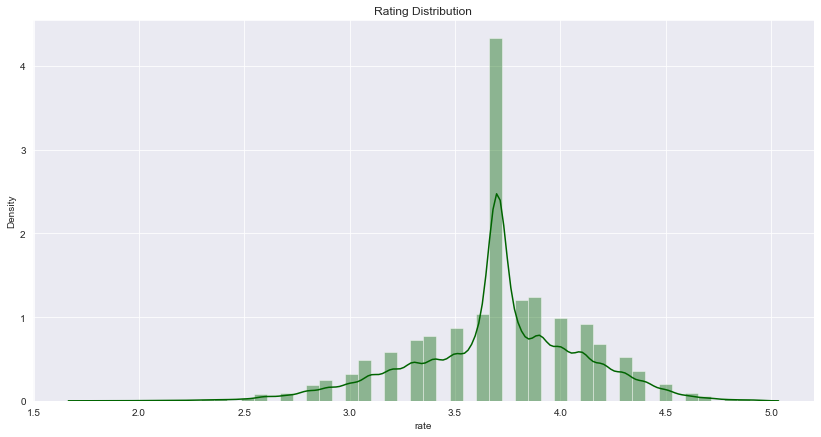

In [83]:
# Plotting a distplot
sns.distplot(df['rate'], color = 'darkgreen')
plt.title('Rating Distribution')
plt.show()

* It follows normal distributon

In [85]:
df.rate.isna().sum()

0

In [86]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost_for_two,reviews_list,menu_item,service_type,serve_to
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [91]:
# Replacing the NaN values for the cost_two feature with mean value

df['cost_for_two'] = df['cost_for_two'].fillna(df['cost_for_two'].mean())
df.cost_for_two.isna().sum()

0

/Users/a/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



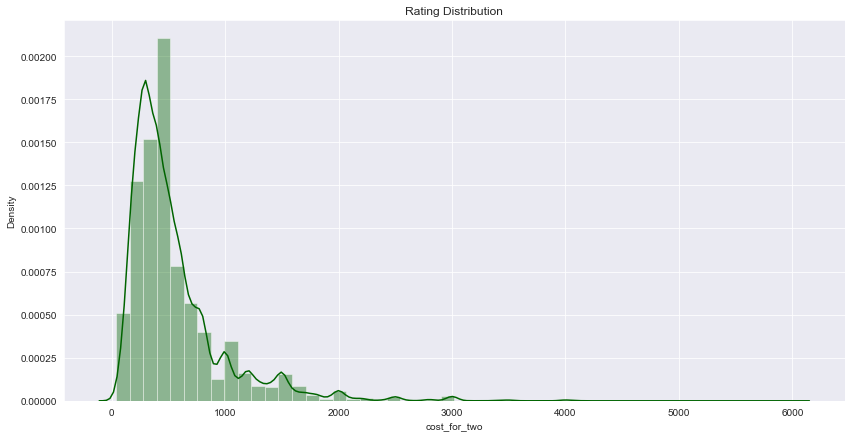

In [92]:
# Plotting a distplot for cost_two feature
sns.distplot(df['cost_for_two'], color = 'darkgreen')
plt.title('Rating Distribution')
plt.show()

## Converting the categorical columns into integer


We will perform One Hot Encoding operation on online_order,book_table,location,rest_type, cuisines columns.

In [93]:
df['online_order'] = pd.get_dummies(df['online_order'], drop_first=True)
df['book_table']   = pd.get_dummies(df['book_table'], drop_first=True)


In [94]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost_for_two,reviews_list,menu_item,service_type,serve_to
0,Jalsa,1,1,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,Spice Elephant,1,0,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,San Churro Cafe,1,0,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,Addhuri Udupi Bhojana,0,0,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,Grand Village,0,0,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [95]:
# Performing One Hot Encoding on rest_type

get_dummies_rest_type = pd.get_dummies(df.rest_type)
get_dummies_rest_type.head(3)

,Bakery,"Bakery, Beverage Shop","Bakery, Cafe","Bakery, Dessert Parlor","Bakery, Food Court","Bakery, Kiosk","Bakery, Quick Bites","Bakery, Sweet Shop",Bar,"Bar, Cafe",...,"Quick Bites, Food Court","Quick Bites, Kiosk","Quick Bites, Meat Shop","Quick Bites, Mess","Quick Bites, Sweet Shop",Sweet Shop,"Sweet Shop, Dessert Parlor","Sweet Shop, Quick Bites",Takeaway,"Takeaway, Delivery"
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [96]:
# Performing One Hot Encoding on location

get_dummies_location = pd.get_dummies(df.location)
get_dummies_location.head(3)

,BTM,Banashankari,Banaswadi,Bannerghatta Road,Basavanagudi,Basaveshwara Nagar,Bellandur,Bommanahalli,Brigade Road,Brookefield,...,Ulsoor,Uttarahalli,"Varthur Main Road, Whitefield",Vasanth Nagar,Vijay Nagar,West Bangalore,Whitefield,Wilson Garden,Yelahanka,Yeshwantpur
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [97]:
# Performing One Hot Encoding on service type

get_dummies_service_type = pd.get_dummies(df.service_type)
get_dummies_service_type.head(3)

,Buffet,Cafes,Delivery,Desserts,Dine-out,Drinks & nightlife,Pubs and bars
0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0


In [98]:
# Concatinating the dataframes
final_df = pd.concat([df,get_dummies_rest_type,get_dummies_service_type, get_dummies_location], axis = 1)
final_df.head()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost_for_two,...,Ulsoor,Uttarahalli,"Varthur Main Road, Whitefield",Vasanth Nagar,Vijay Nagar,West Bangalore,Whitefield,Wilson Garden,Yelahanka,Yeshwantpur
0,Jalsa,1,1,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,...,0,0,0,0,0,0,0,0,0,0
1,Spice Elephant,1,0,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,...,0,0,0,0,0,0,0,0,0,0
2,San Churro Cafe,1,0,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,...,0,0,0,0,0,0,0,0,0,0
3,Addhuri Udupi Bhojana,0,0,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,...,0,0,0,0,0,0,0,0,0,0
4,Grand Village,0,0,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,...,0,0,0,0,0,0,0,0,0,0


In [99]:
final_df = final_df.drop(["name","rest_type","location", 'cuisines', 'dish_liked', 'reviews_list'],axis = 1)
final_df.head()

,online_order,book_table,rate,votes,cost_for_two,menu_item,service_type,serve_to,Bakery,"Bakery, Beverage Shop",...,Ulsoor,Uttarahalli,"Varthur Main Road, Whitefield",Vasanth Nagar,Vijay Nagar,West Bangalore,Whitefield,Wilson Garden,Yelahanka,Yeshwantpur
0,1,1,4.1,775,800.0,[],Buffet,Banashankari,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,4.1,787,800.0,[],Buffet,Banashankari,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,3.8,918,800.0,[],Buffet,Banashankari,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,3.7,88,300.0,[],Buffet,Banashankari,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,3.8,166,600.0,[],Buffet,Banashankari,0,0,...,0,0,0,0,0,0,0,0,0,0


In [100]:
final_df = final_df.drop(["menu_item","service_type","serve_to"],axis = 1)
final_df.head()

,online_order,book_table,rate,votes,cost_for_two,Bakery,"Bakery, Beverage Shop","Bakery, Cafe","Bakery, Dessert Parlor","Bakery, Food Court",...,Ulsoor,Uttarahalli,"Varthur Main Road, Whitefield",Vasanth Nagar,Vijay Nagar,West Bangalore,Whitefield,Wilson Garden,Yelahanka,Yeshwantpur
0,1,1,4.1,775,800.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,4.1,787,800.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,3.8,918,800.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,3.7,88,300.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,3.8,166,600.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<AxesSubplot:>

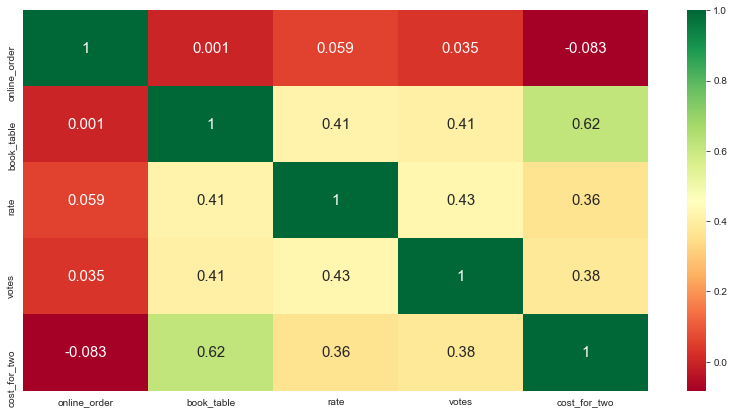

In [101]:
sns.heatmap(df.corr(), annot=True, cmap="RdYlGn", annot_kws={"size":15})

In [102]:
final_df.shape

(51717, 198)

# Feature Selection

In [103]:
# Splitting the features into independent and dependent variables
X = final_df.drop(['rate'], axis = 1)
X

,online_order,book_table,votes,cost_for_two,Bakery,"Bakery, Beverage Shop","Bakery, Cafe","Bakery, Dessert Parlor","Bakery, Food Court","Bakery, Kiosk",...,Ulsoor,Uttarahalli,"Varthur Main Road, Whitefield",Vasanth Nagar,Vijay Nagar,West Bangalore,Whitefield,Wilson Garden,Yelahanka,Yeshwantpur
0,1,1,775,800.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,787,800.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,918,800.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,88,300.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,166,600.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51712,0,0,27,1500.0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
51713,0,0,0,600.0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
51714,0,0,0,2000.0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
51715,0,1,236,2500.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [104]:
y = final_df['rate']
y

0        4.100000
1        4.100000
2        3.800000
3        3.700000
4        3.800000
           ...   
51712    3.600000
51713    3.700449
51714    3.700449
51715    4.300000
51716    3.400000
Name: rate, Length: 51717, dtype: float64

## Feature importance

Feature importance gives you a score for each feature of your data, the higher the score the more important or relevant is the feature towards your output variable

Feature importance is an in built class that comes with Tree Based Regressor, we will be using Extra Tree Regressor for extracting the top 10 features for the dataset

In [105]:
from sklearn.ensemble import ExtraTreesRegressor

model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [106]:
print(model.feature_importances_)

[ 2.34664948e-02  1.59756093e-01  3.55930500e-01  1.03357073e-01
  2.07385880e-03  1.75724371e-07  6.04569986e-04  7.48602003e-04
  4.60064424e-05  1.64254305e-14  2.36354204e-03 -6.05621227e-18
  2.46910705e-03  1.31092522e-05  1.35164097e-03  5.75577288e-06
  1.05808687e-04  1.23638649e-05  2.07906022e-03  3.39617956e-05
  4.58191622e-04  8.71404904e-04  3.94026034e-07  1.02960790e-02
  6.62411555e-04  7.72612818e-05  1.22731919e-03  1.90976399e-03
  3.76549716e-05  4.17148670e-05  3.79760393e-04  1.34559009e-02
  2.77622107e-03  7.25355769e-04  4.88265999e-07  7.17015288e-05
  8.67432567e-05  1.18782577e-04  2.14670485e-06  3.82873348e-05
  1.51523294e-04  5.39684869e-06  2.62083659e-05  5.42389648e-03
  1.23893712e-02  2.36379101e-04  4.09401443e-04  1.99094489e-03
  4.37286405e-06  9.11478988e-05  9.27648385e-04  1.72080384e-05
  1.74492896e-04  5.69068229e-04  3.50131153e-05  4.54054096e-06
  2.89643891e-06  3.16949085e-03  1.51947207e-06  1.05245192e-04
  6.59885290e-06  7.84664

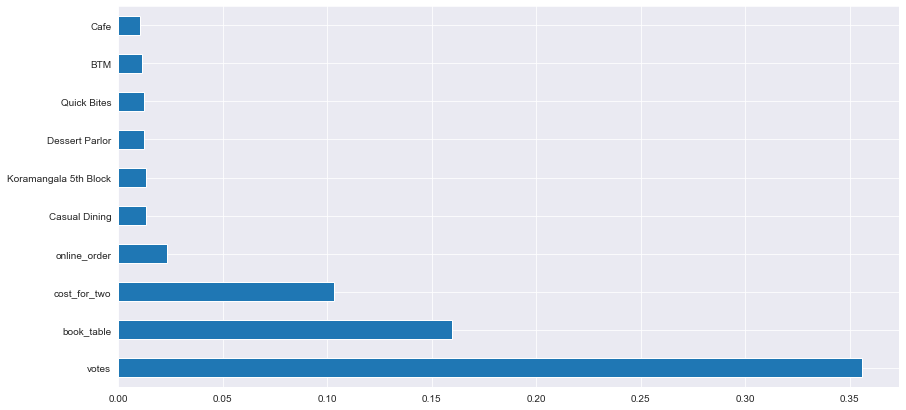

In [108]:
#plotting graph of feature importances for better visualization

feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

* From the above graph we can see the top 10 most important features which are very important to train our model and get correct predictions. We will be using these features for our model building.

# Model Building

In [109]:
#Spliting data into test and train

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X , y , test_size = 0.20)

# Linear Regression

In [110]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train, y_train)

lr_pred = lr.predict(X_test)

In [111]:
r2 = r2_score(y_test,lr_pred)
print('R-Square Score: ',r2*100)

R-Square Score:  32.87139712860101


In [112]:
# Calculate the absolute errors
lr_errors = abs(lr_pred - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(lr_pred), 2), 'degrees.')

Mean Absolute Error: 3.7 degrees.


In [113]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (lr_errors / y_test)
# Calculate and display accuracy
lr_accuracy = 100 - np.mean(mape)
print('Accuracy for Logistic Regression is :', round(lr_accuracy, 2), '%.')

Accuracy for Logistic Regression is : 92.98 %.


In [114]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
print('mse:',metrics.mean_squared_error(y_test, lr_pred))
print('mae:',metrics.mean_absolute_error(y_test, lr_pred))

mse: 0.1047627043215776
mae: 0.2450939960587941


/Users/a/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='rate', ylabel='Density'>

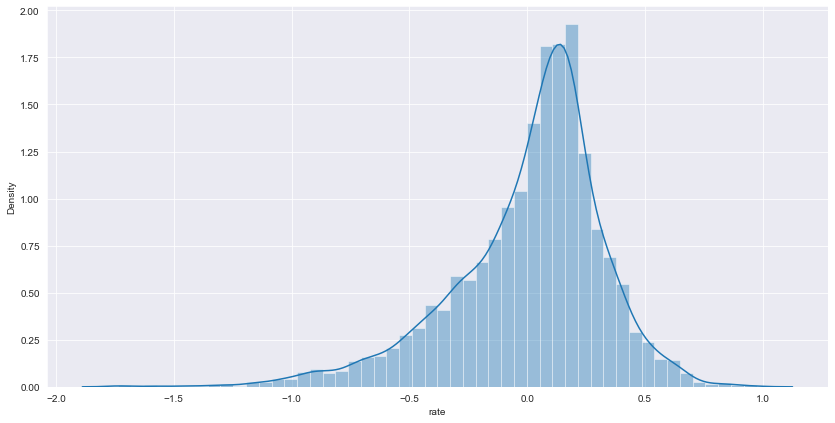

In [115]:
sns.distplot(y_test-lr_pred)

# Decision tree Regressor

In [117]:
from sklearn.tree import DecisionTreeRegressor

dtree = DecisionTreeRegressor(criterion='mse')
dtree.fit(X_train, y_train)

DecisionTreeRegressor()

In [118]:
dtree_pred = dtree.predict(X_test)

In [119]:
r2 = r2_score(y_test,dtree_pred)
print('R-Square Score: ',r2*100)

# Calculate the absolute errors
dtree_errors = abs(dtree_pred - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(dtree_pred), 2), 'degrees.')

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (dtree_errors / y_test)
# Calculate and display accuracy
dtree_accuracy = 100 - np.mean(mape)
print('Accuracy for Decision tree regressor is :', round(dtree_accuracy, 2), '%.')

R-Square Score:  86.3157602901578
Mean Absolute Error: 3.7 degrees.
Accuracy for Decision tree regressor is : 98.87 %.


# Random Forest Regressor Algorithm

In [120]:
from sklearn.ensemble import RandomForestRegressor

random_forest_regressor = RandomForestRegressor()
random_forest_regressor.fit(X_train, y_train)


RandomForestRegressor()

In [121]:
rf_pred = random_forest_regressor.predict(X_test)

In [122]:
r2 = r2_score(y_test,rf_pred)
print('R-Square Score: ',r2*100)

# Calculate the absolute errors
rf_errors = abs(rf_pred - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(rf_pred), 2), 'degrees.')

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (rf_errors / y_test)
# Calculate and display accuracy
rf_accuracy = 100 - np.mean(mape)
print('Accuracy for random forest regressor is :', round(rf_accuracy, 2), '%.')

R-Square Score:  90.50880758505792
Mean Absolute Error: 3.7 degrees.
Accuracy for random forest regressor is : 98.49 %.
